<a href="https://colab.research.google.com/github/JohanSantanaGalvanJob/Data-Processing-with-Apache-Pig-Impala-y-Hive/blob/main/Procesamiento_de_Datos_Meteorol%C3%B3gicos_con_Apache_Pig%2C_Impala_y_Hive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Environment Preparation

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget http://apache.osuosl.org/pig/pig-0.17.0/pig-0.17.0.tar.gz
!tar -xvf pig-0.17.0.tar.gz
!ls

import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['PIG_HOME'] = '/content/pig-0.17.0'
os.environ['PATH'] = '%s/bin:%s' % (os.environ['PIG_HOME'], os.environ['PATH'])

!pig -version

In [ ]:
%%writefile scriptParte1.pig
-- Cargar datos desde un archivo CSV
weather_data = LOAD './weather.csv' USING PigStorage(',') AS (
date:chararray,
temperature:int,
pressure:int,
humidity:int
);
-- Visualización básica del contenido

-- Filtrar registros con datos faltantes o erróneos
clean_weather_data = FILTER weather_data BY temperature IS NOT NULL AND pressure
IS NOT NULL AND humidity IS NOT NULL;
-- Filtrar valores que no son realistas
valid_weather_data = FILTER clean_weather_data BY temperature > -50 AND
temperature < 50; -- Ejemplo de rango de temperatura válido

DUMP weather_data;

-- Calcular la temperatura media excluyendo registros incompletos
grouped_data = GROUP valid_weather_data ALL;
average_temperature = FOREACH grouped_data GENERATE
AVG(valid_weather_data.temperature) AS avg_temp;
DUMP average_temperature;

-- Cargar otra fuente de datos como datos de ubicación
location_data = LOAD './location.csv' USING PigStorage(',') AS (
date:chararray,
location:chararray
);
-- Unir datos meteorológicos con datos de ubicación
joined_data = JOIN valid_weather_data BY date, location_data BY date;
-- Aplicar transformaciones o filtros adicionales según sea necesario
-- Por ejemplo, seleccionar los datos de una ubicación específica
filtered_data = FILTER joined_data BY location == 'Las Palmas';
DUMP filtered_data;

-- Guardar los resultados en un archivo
STORE filtered_data INTO './output' USING PigStorage(',');





Writing scriptParte1.pig


In [ ]:
!pig -x local -f scriptParte1.pig

In [ ]:

!mv /content/output/part-r-00000 /content/output.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Cargar los datos, seleccionamos las dos primeras columnas
data = pd.read_csv('./output.csv', header=None, usecols=[0, 1])

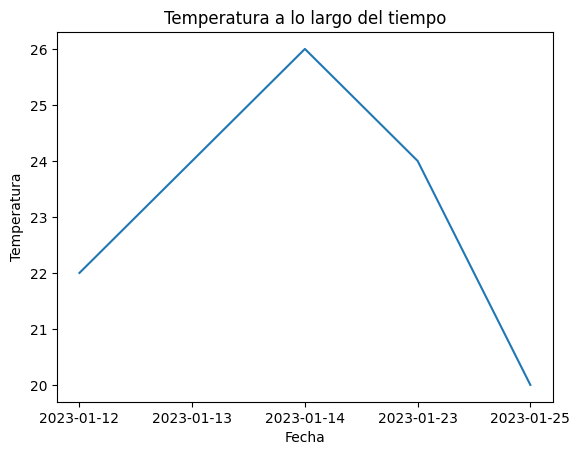

In [ ]:
# Asignamos nombres a estas dos columnas
data.columns = ['date', 'temperature']
# Visualizar los datos temporales de temperatura
plt.plot(data['date'], data['temperature'])
plt.title('Temperatura a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.show()